# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum - Expansion DLC: Double Pendulum
## 02.19.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
from matplotlib.animation import FuncAnimation
import time
import imageio

In [2]:
from matplotlib.patches import Circle

In [3]:
sns.set_style(style='whitegrid')

In [4]:
#url: https://ir.canterbury.ac.nz/bitstream/handle/10092/12659/chen_2008_report.pdf

In [11]:
# -------- PRIMARY PARAMETERS --------
# Masses of pendulums m_1, m_2
m_1 = 1
m_2 = 1
# Length of pendulums L_1, L_2
L_1 = 1
L_2 = 1
# Damping coefficients q_1, q_2
q_1 = 0
q_2 = 0
# Driving frequencies Omega_D_1, Omega_D_2
Omega_D_1 = 0
Omega_D_2 = 0
Omega_D_1 *= np.pi/180
Omega_D_2 *= np.pi/180
# Driving amplitudes F_D_1, F_D_2
F_D_1 = 0
F_D_2 = 0
# Theta(0)
theta_1 = 80
theta_2 = 120
theta_1 *= np.pi/180
theta_2 *= np.pi/180
# Omega(ω)
omega_1 = 0
omega_2 = 0

# Integration time t_iteration
t_iteration = 60
# Stepsize
fps = 30
dt = 1/fps


# -------- OTHERS --------
# Accuracy
accuracy = 1e-6

In [6]:
def mode_choose(mode):
    
    current_mode = ('..\Release\pendulum_double.exe ' +
                    mode + ' ' +
                    str(m_1) + ' ' +
                    str(m_2) + ' ' +
                    str(L_1) + ' ' +
                    str(L_2) + ' ' +
                    str(q_1) + ' ' +
                    str(q_2) + ' ' +
                    str(Omega_D_1) + ' ' +
                    str(Omega_D_2) + ' ' +
                    str(F_D_1) + ' ' +
                    str(F_D_2) + ' ' +
                    str(theta_1) + ' ' +
                    str(theta_2) + ' ' +
                    str(omega_1) + ' ' +
                    str(omega_2) + ' ' +
                    str(t_iteration) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                )
    
    return(current_mode)

In [9]:
mode_runge = mode_choose(mode='runge')
mode_rkck = mode_choose(mode='rkck')
mode_euler = mode_choose(mode='euler')
mode_cromer = mode_choose(mode='eulercromer')

In [28]:
os.system(mode_runge)
data_runge = np.genfromtxt('pendulum_double.dat')
coordinates_runge = np.genfromtxt('pendulum_double_coords.dat')

os.system(mode_rkck)
data_rkck = np.genfromtxt('pendulum_double.dat')
coordinates_rkck = np.genfromtxt('pendulum_double_coords.dat')

'''os.system(mode_euler)
data_euler = np.genfromtxt('pendulum_double.dat')

os.system(mode_cromer)
data_eulercromer = np.genfromtxt('pendulum_double.dat')''';

In [10]:
steps = 1
image_dpi = 150
image_format = 'pdf'

# 4th-order Runge-Kutta

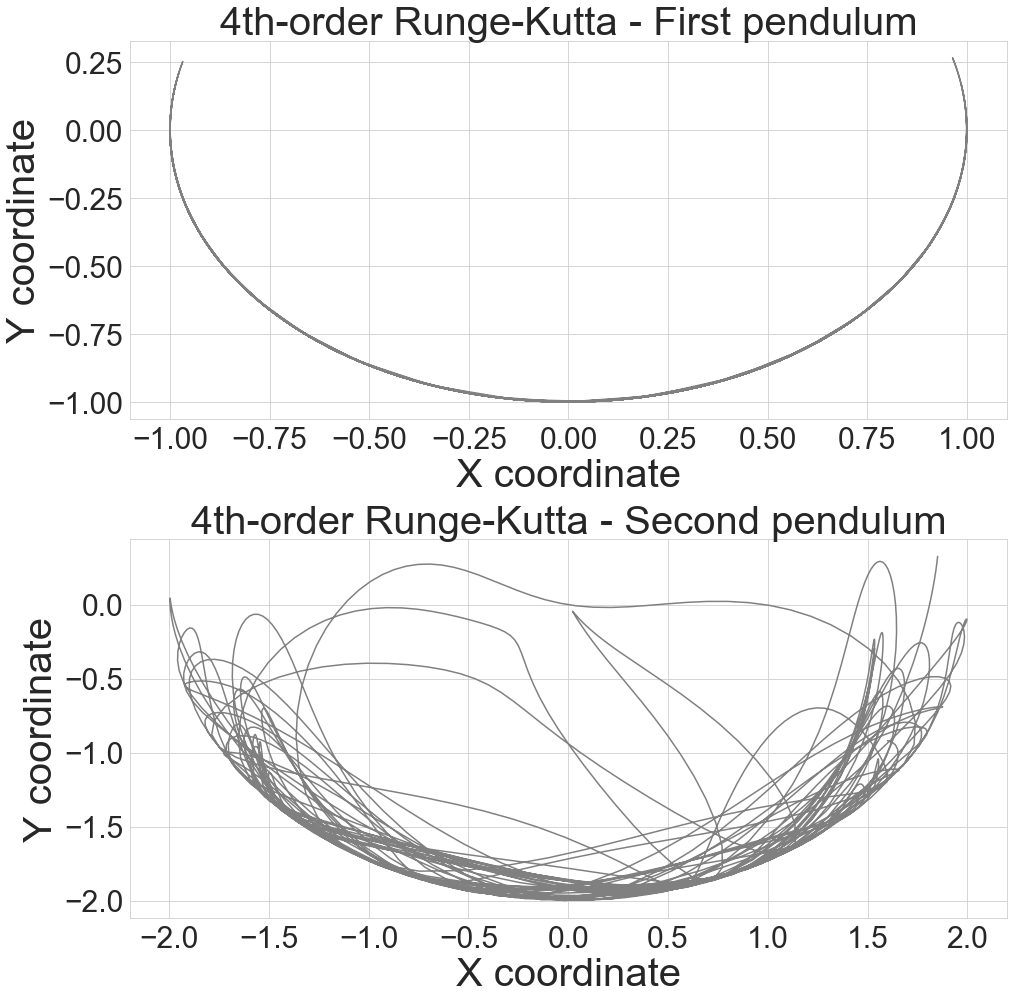

In [30]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(coordinates_runge[::steps,1], coordinates_runge[::steps,2], color='grey')
axes[1].plot(coordinates_runge[::steps,3], coordinates_runge[::steps,4], color='grey')

#axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1], color='red')

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)
axes[1].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('X coordinate', fontsize=40)
axes[1].set_xlabel('X coordinate', fontsize=40)

axes[0].set_ylabel('Y coordinate', fontsize=40)
axes[1].set_ylabel('Y coordinate', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

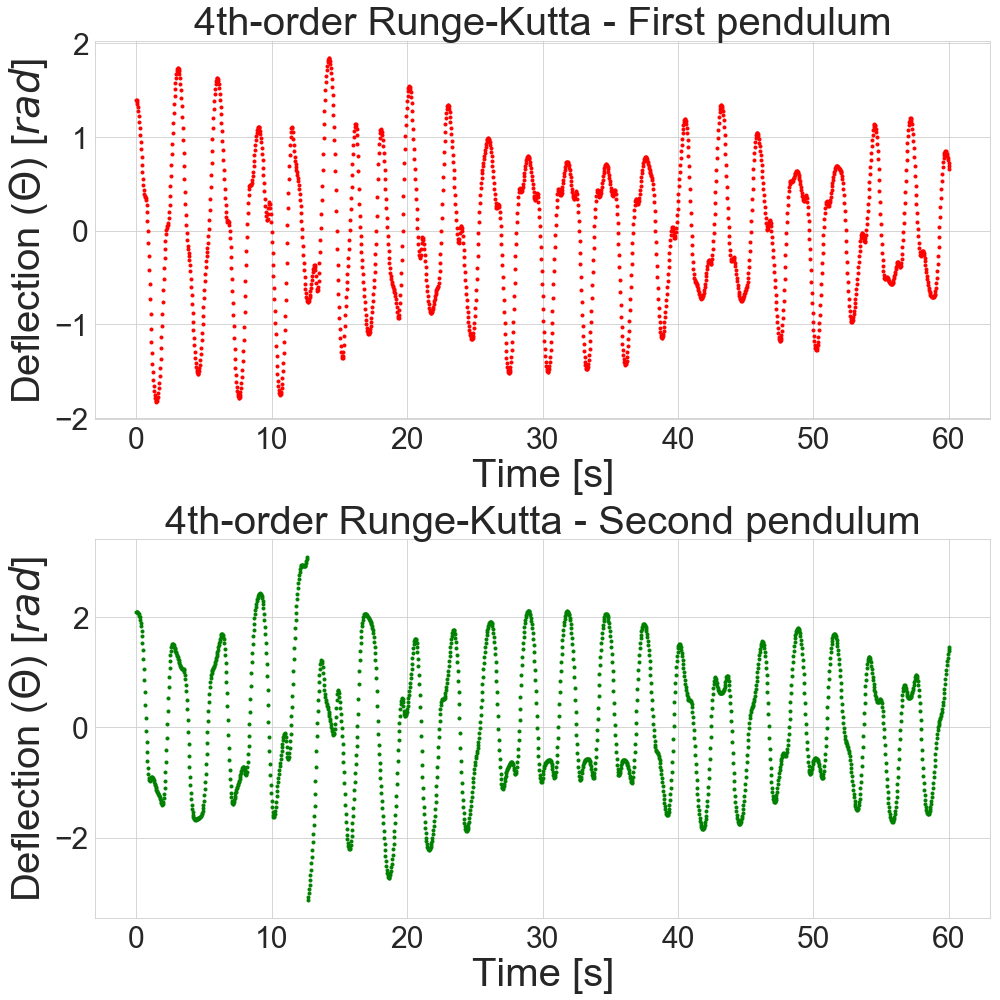

In [44]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

if(len(data_runge[::steps,0]) < 1500):
    axes[0].plot(data_runge[::steps,0], data_runge[::steps,1], color='grey')
    axes[1].plot(data_runge[::steps,0], data_runge[::steps,3], color='grey')

axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1], marker='.', color='red')
axes[1].scatter(data_runge[::steps,0], data_runge[::steps,3], marker='.', color='green')

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)
axes[1].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_runge_double.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

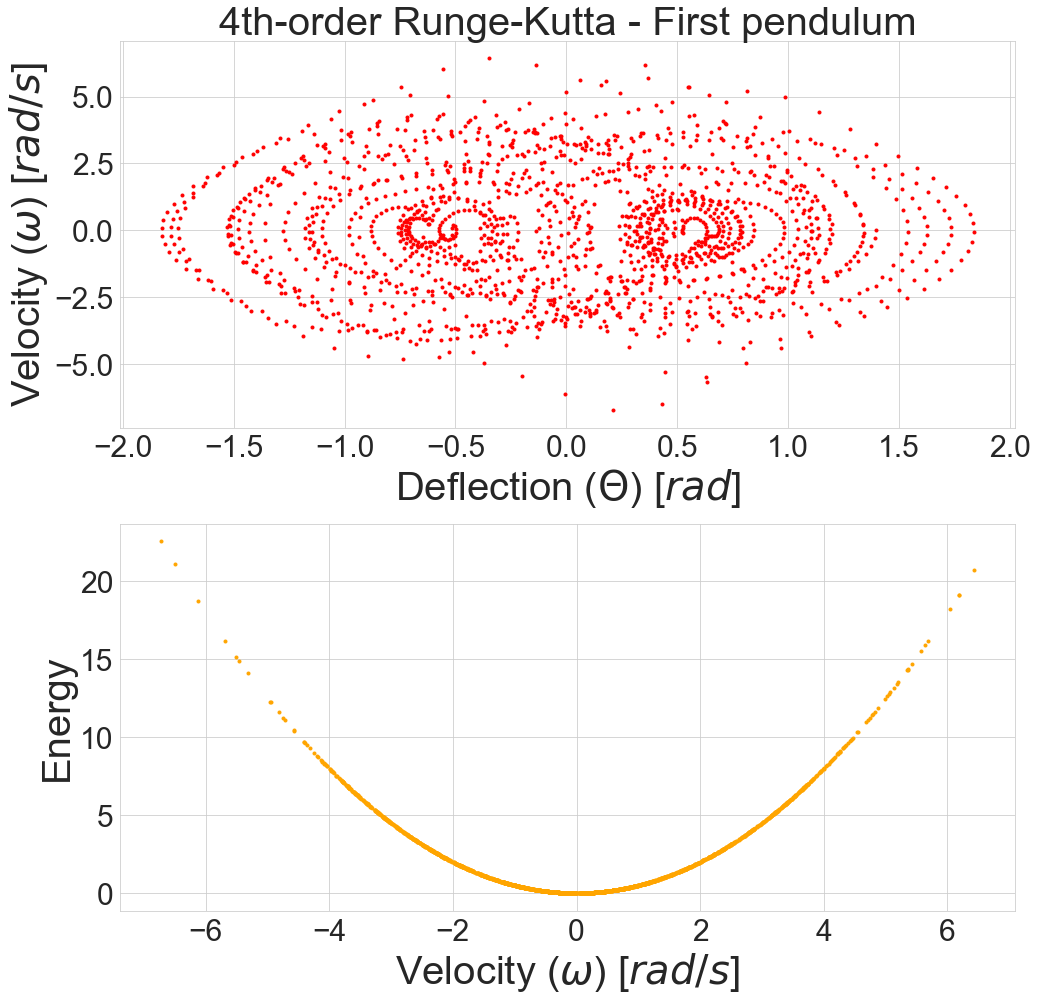

In [32]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].scatter(data_runge[::steps,1], data_runge[::steps,2], marker='.', color='red')
axes[1].scatter(data_runge[::steps,2], data_runge[::steps,6], marker='.', color='orange')

axes[0].set_title('4th-order Runge-Kutta - First pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

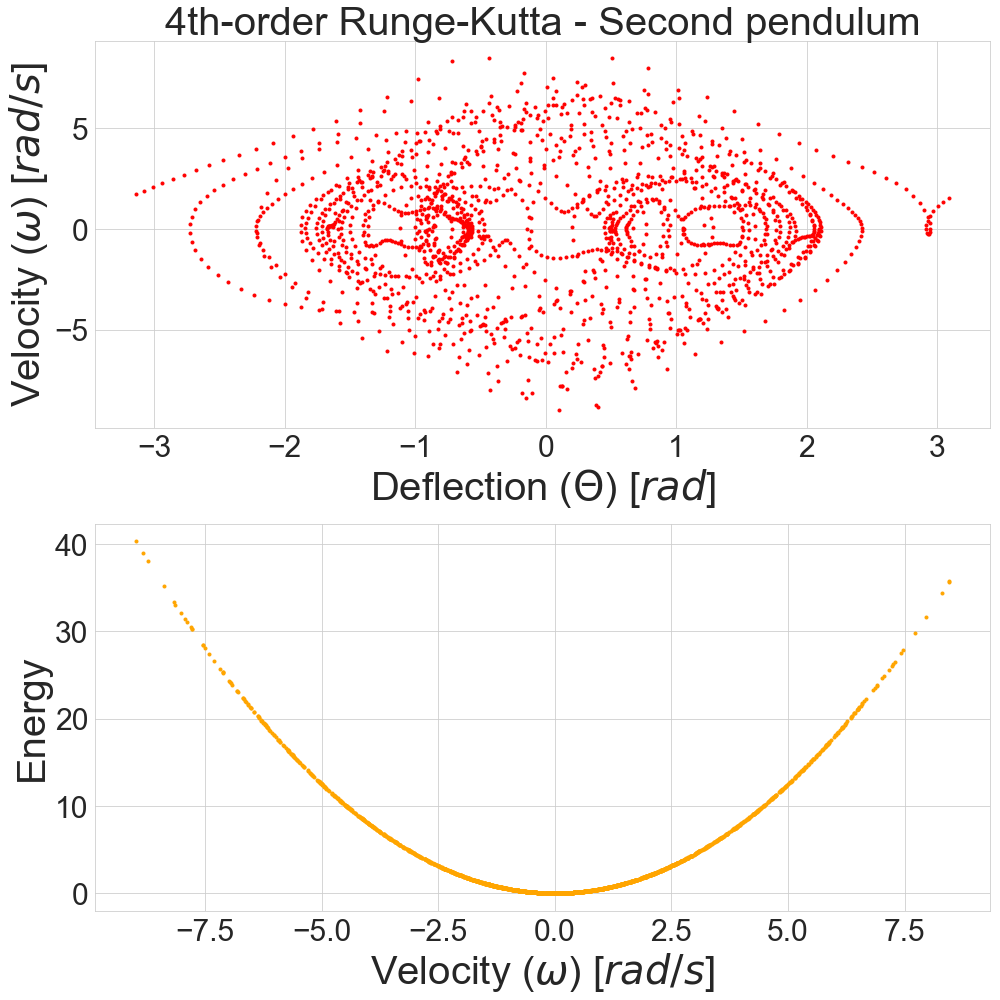

In [33]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].scatter(data_runge[::steps,3], data_runge[::steps,4], marker='.', color='red')
axes[1].scatter(data_runge[::steps,4], data_runge[::steps,7], marker='.', color='orange')

axes[0].set_title('4th-order Runge-Kutta - Second pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

# Runge-Kutta-Cash-Karp

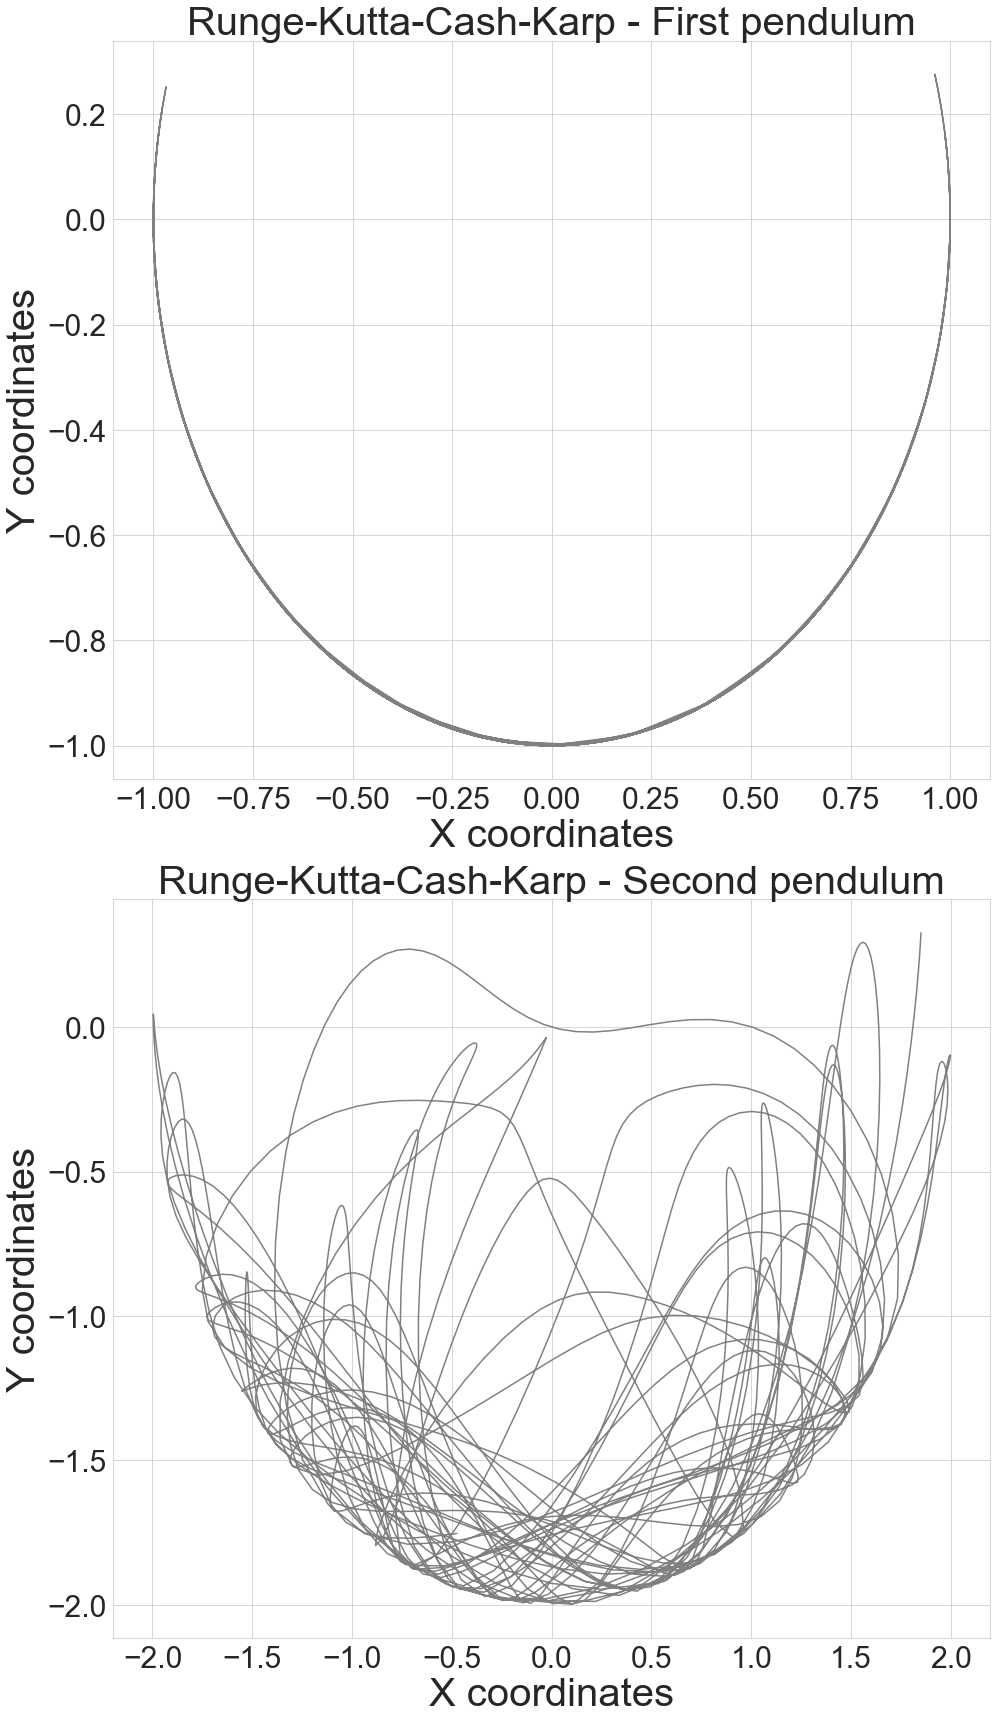

In [34]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*12))

axes[0].plot(coordinates_rkck[::steps,1], coordinates_rkck[::steps,2], color='grey')
axes[1].plot(coordinates_rkck[::steps,3], coordinates_rkck[::steps,4], color='grey')

axes[0].set_title('Runge-Kutta-Cash-Karp - First pendulum', fontsize=40)
axes[1].set_title('Runge-Kutta-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('X coordinates', fontsize=40)
axes[1].set_xlabel('X coordinates', fontsize=40)

axes[0].set_ylabel('Y coordinates', fontsize=40)
axes[1].set_ylabel('Y coordinates', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

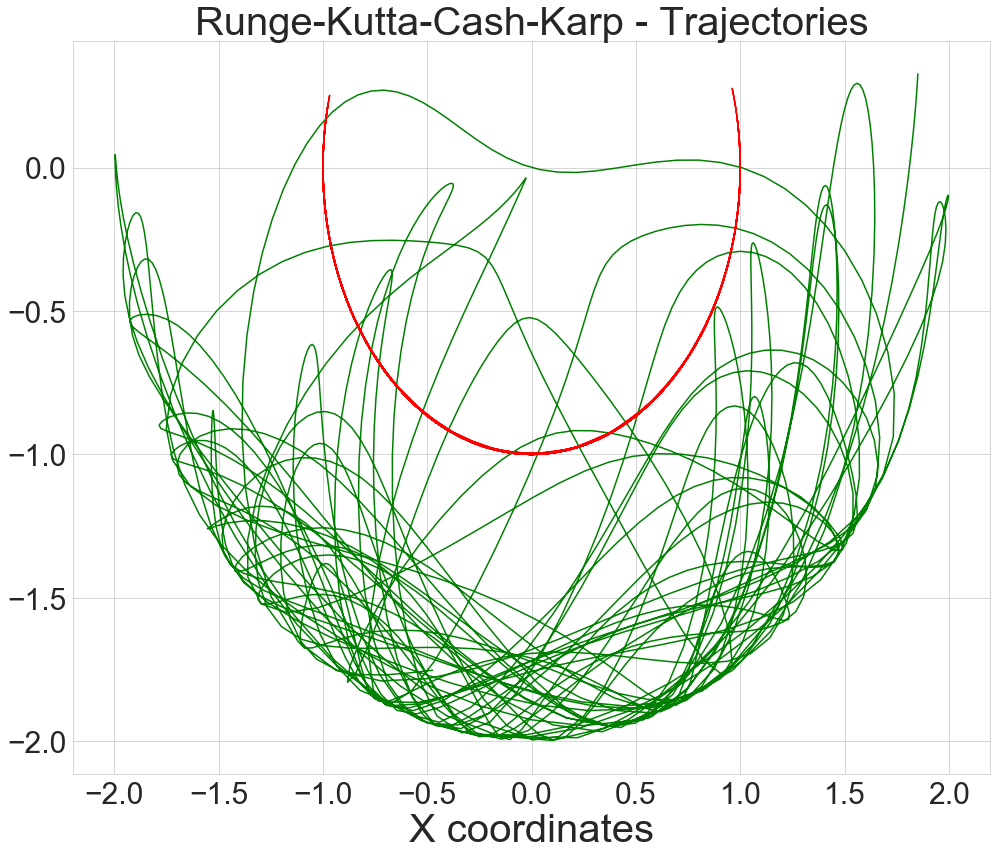

In [35]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*12))

axes.plot(coordinates_rkck[::steps,3], coordinates_rkck[::steps,4], color='green')
axes.plot(coordinates_rkck[::steps,1], coordinates_rkck[::steps,2], color='red')

axes.set_title('Runge-Kutta-Cash-Karp - Trajectories', fontsize=40)

axes.set_xlabel('X coordinates', fontsize=40)
axes.set_xlabel('X coordinates', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

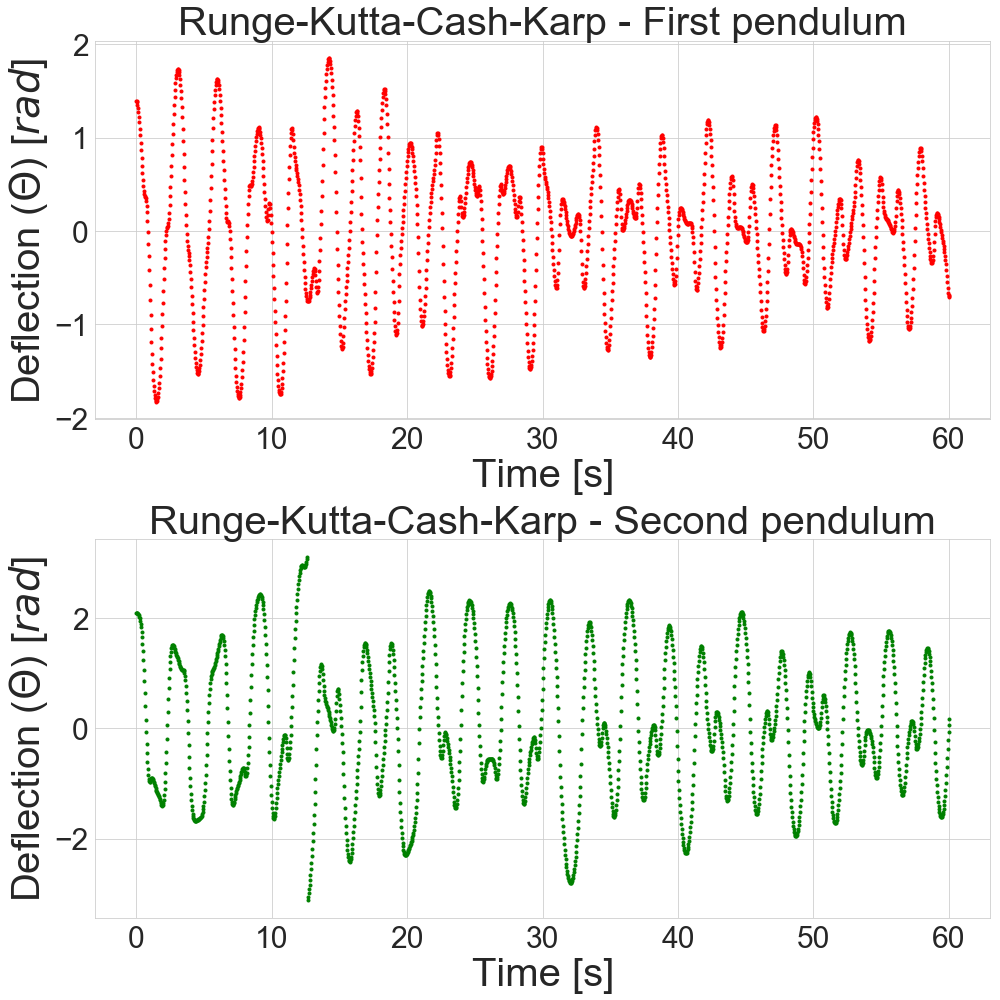

In [36]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

if(len(data_rkck[::steps,0]) < 1500):
    axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='grey')
    axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color='grey')

axes[0].scatter(data_rkck[::steps,0], data_rkck[::steps,1], marker='.', color='red')
axes[1].scatter(data_rkck[::steps,0], data_rkck[::steps,3], marker='.', color='green')

axes[0].set_title('Runge-Kutta-Cash-Karp - First pendulum', fontsize=40)
axes[1].set_title('Runge-Kutta-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_rkck_double.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

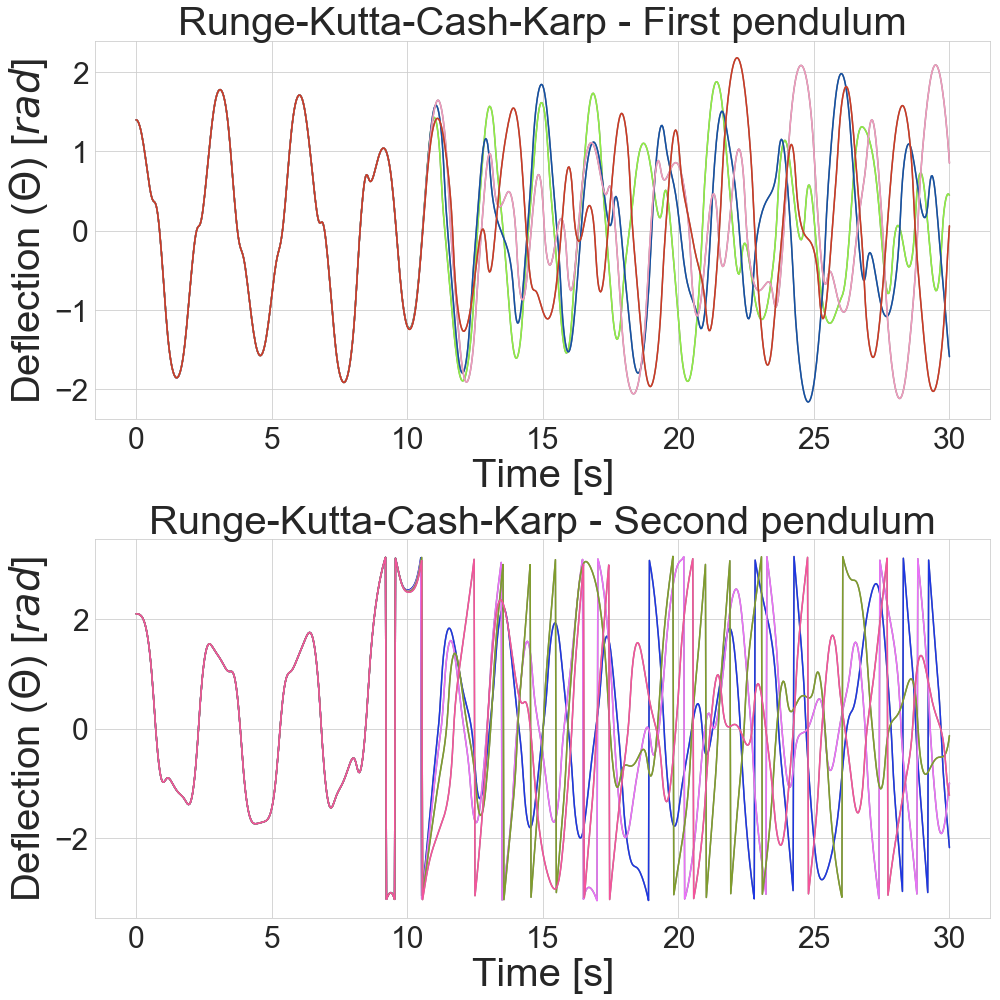

In [19]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

iterations = 4
thete_temp = theta_2
for i in range(0, iterations):
    
    theta_2 += i * np.pi/180 * 1e-03
    t_iteration = 30
    mode_rkck = mode_choose(mode='rkck')
    os.system(mode_rkck)
    data_rkck = np.genfromtxt('pendulum_double.dat')
    
    theta_2 = thete_temp
    
    color_1 = np.array((np.random.rand(),np.random.rand(),np.random.rand()))
    color_2 = np.array((np.random.rand(),np.random.rand(),np.random.rand()))
    
    if(len(data_rkck[::steps,0]) < 1500):
        axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='grey')
        axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color='grey')

    axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color=color_1)
    axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color=color_2)

axes[0].set_title('Runge-Kutta-Cash-Karp - First pendulum', fontsize=40)
axes[1].set_title('Runge-Kutta-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_rkck_double_diff.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

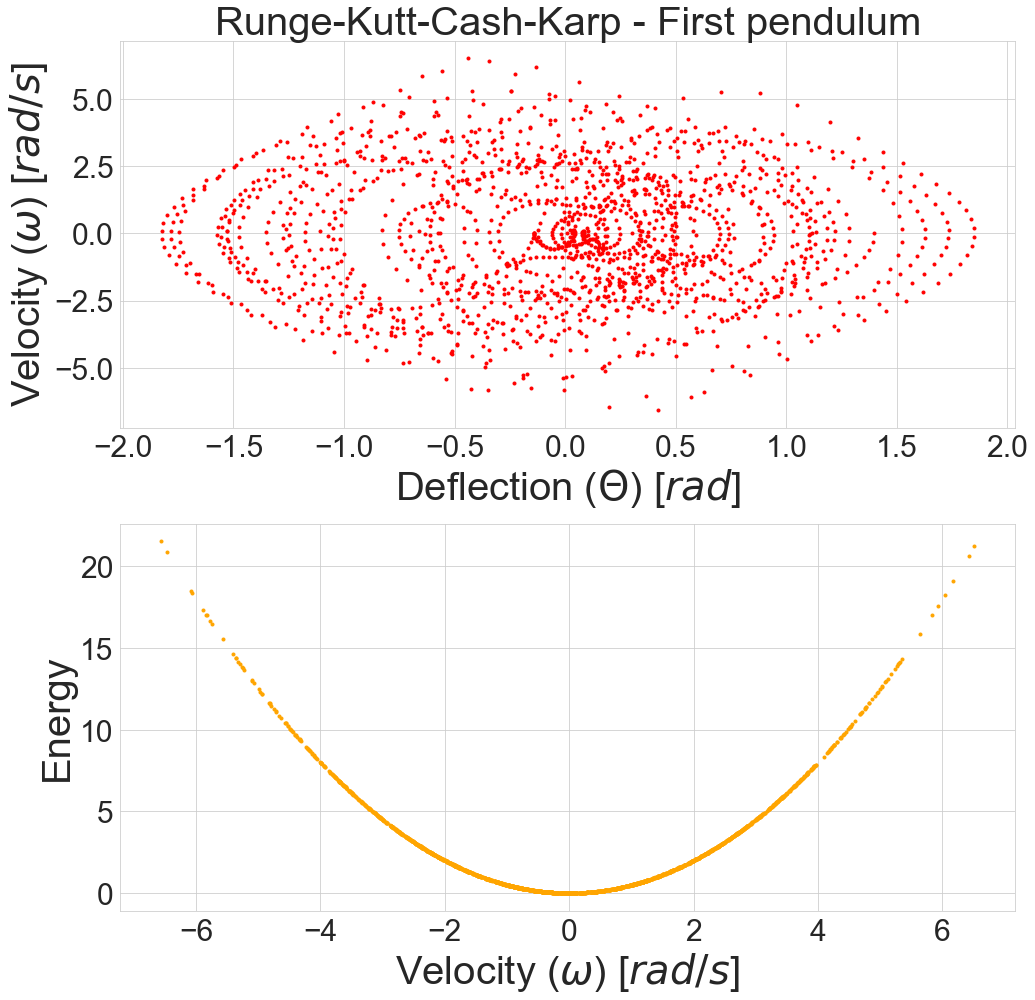

In [37]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].scatter(data_rkck[::steps,1], data_rkck[::steps,2], marker='.', color='red')
axes[1].scatter(data_rkck[::steps,2], data_rkck[::steps,6], marker='.', color='orange')

axes[0].set_title('Runge-Kutt-Cash-Karp - First pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

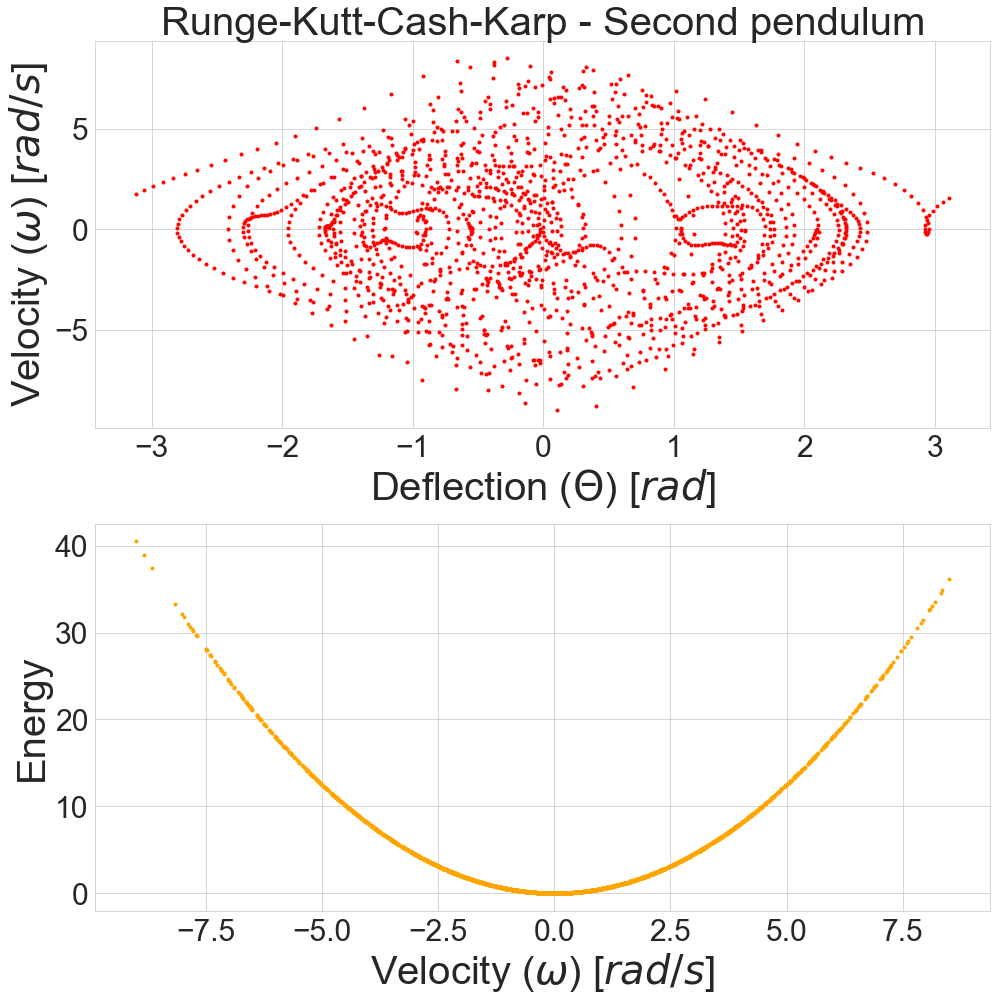

In [38]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].scatter(data_rkck[::steps,3], data_rkck[::steps,4], marker='.', color='red')
axes[1].scatter(data_rkck[::steps,4], data_rkck[::steps,7], marker='.', color='orange')

axes[0].set_title('Runge-Kutt-Cash-Karp - Second pendulum', fontsize=40)

axes[0].set_xlabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[0].set_ylabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_xlabel('Velocity ($\omega$) [$rad/s$]', fontsize=40)
axes[1].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.show()

# Animation

In [23]:
def ANIMATE():
    fig, ax = plt.subplots(figsize=(14,14))

    x1 = coordinates_rkck[::steps,1]
    y1 = coordinates_rkck[::steps,2]
    x2 = coordinates_rkck[::steps,3]
    y2 = coordinates_rkck[::steps,4]

    # Pendulum's circle size
    r_1 = 0.05 * 1/np.power(m_1, 3)
    r_2 = 0.05 * 1/np.power(m_2, 3)
    r = max(r_1, r_2)
    # Plot a trail of the m2 bob's position for the last trail_secs seconds.
    trail_secs = 1
    # This corresponds to max_trail time points.
    max_trail = int(trail_secs / dt)

    ##ANIMATION STUFF BEGINS HERE##

    def animation(i):

        # Plot and save an image of the double pendulum configuration for time
        # point i.
        # The pendulum rods.
        ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
        # Circles representing the anchor point of rod 1, and bobs 1 and 2.
        c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
        c1 = Circle((x1[i], y1[i]), r_1, fc='r', ec='r', zorder=10)
        c2 = Circle((x2[i], y2[i]), r_2, fc='g', ec='g', zorder=10)
        ax.add_patch(c0)
        ax.add_patch(c1)
        ax.add_patch(c2)

        ax.plot(x1[0:i], y1[0:i], c='r', solid_capstyle='butt', lw=2)
        ax.plot(x2[0:i], y2[0:i], c='g', solid_capstyle='butt', lw=2)

        # Centre the image on the fixed anchor point, and ensure the axes are equal
        ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
        ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
        ax.set_aspect('equal', adjustable='box')
        plt.axis('off')
        plt.savefig('frames/_img{:04d}.png'.format(i), dpi=72)
        plt.cla()

    for i in range(0, len(x1)):
        sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1)))
        sys.stdout.flush()
        animation(i)

In [24]:
def VIDEO():
    path = '.\\frames\\'
    image_folder = os.fsencode(path)
    filenames = []

    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith( ('.jpeg', '.png', '.gif') ):
            filenames.append(filename)

    filenames.sort()

    i = 1
    with imageio.get_writer('double_pendulum_damped_driven.mp4', fps=40) as writer:
        for filename in filenames:
            image = imageio.imread('.\\frames\\' + filename)
            sys.stdout.write('\r' + str(i) + ' / ' + str(len(filenames)))
            sys.stdout.flush()
            i += 1
            writer.append_data(image)

3601 / 3601

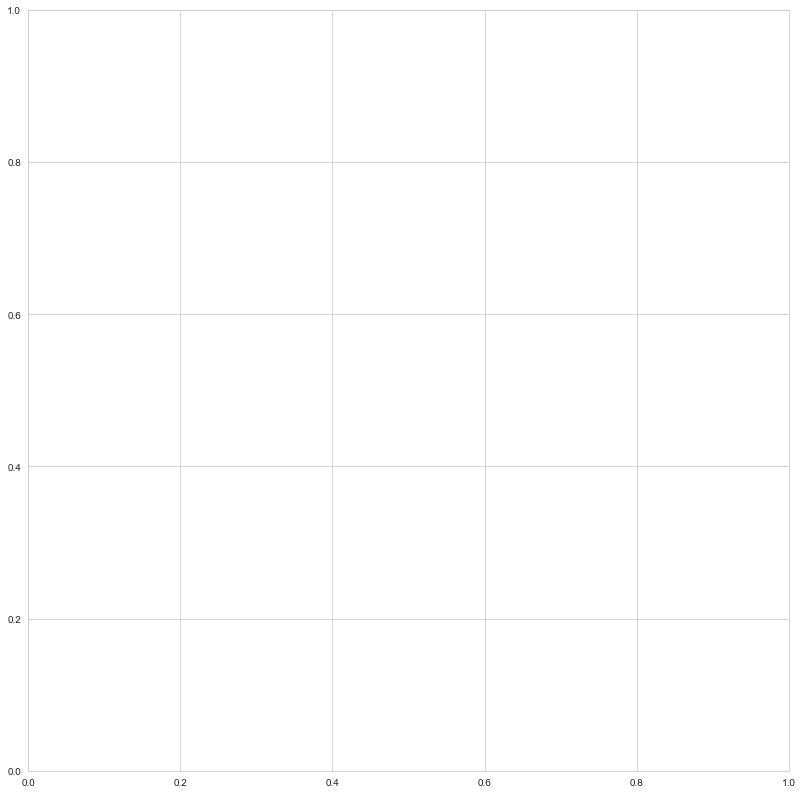

In [151]:
#ANIMATE()

In [152]:
#VIDEO()

3601 / 3601